In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("health_train.csv").copy()
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000,male,25.745,no,northeast,2,3279.869
1,36.977,female,25.744,yes,southeast,3,21454.494
2,18.000,male,30.030,no,southeast,1,1720.354
3,37.000,male,30.677,no,northeast,3,6801.438
4,58.000,male,32.010,no,southeast,1,11946.626


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2500 non-null   float64
 1   sex       2500 non-null   object 
 2   bmi       2500 non-null   float64
 3   smoker    2500 non-null   object 
 4   region    2500 non-null   object 
 5   children  2500 non-null   int64  
 6   charges   2500 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 136.8+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2500.000,39.003,12.265,18.000,28.846,39.350,48.689,64.000
bmi,2500.000,30.575,5.390,15.960,26.718,30.200,34.046,53.130
children,2500.000,2.488,1.707,0.000,1.000,2.000,4.000,5.000
charges,2500.000,12679.312,10593.270,1121.874,5612.781,9455.047,14440.628,63770.428


In [5]:
df.shape

(2500, 7)

In [6]:
df.isnull().any()

age         False
sex         False
bmi         False
smoker      False
region      False
children    False
charges     False
dtype: bool

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [8]:
df.duplicated().value_counts()

False    2500
dtype: int64

In [9]:
for i in df.columns:
    print(df[i].value_counts())

18.000    57
19.000    52
48.000    43
39.000    43
33.000    35
          ..
30.087     1
42.856     1
46.649     1
54.709     1
62.461     1
Name: age, Length: 1347, dtype: int64
male      1387
female    1113
Name: sex, dtype: int64
32.300    9
28.310    8
31.350    7
38.060    7
33.330    7
         ..
36.945    1
28.940    1
29.150    1
35.113    1
28.955    1
Name: bmi, Length: 2008, dtype: int64
no     2124
yes     376
Name: smoker, dtype: int64
southeast    699
northwest    613
northeast    606
southwest    582
Name: region, dtype: int64
0    427
2    426
4    418
3    416
5    409
1    404
Name: children, dtype: int64
14799.031    1
7742.110     1
2196.473     1
48824.450    1
9335.022     1
            ..
2416.955     1
6611.575     1
5550.921     1
1615.767     1
7731.427     1
Name: charges, Length: 2500, dtype: int64


In [10]:
df.children = df.children.map({0 : "zero", 1 : "one", 2 : "two", 3 : "three", 4 : "four", 5 : "five"})

In [11]:
df.children

0         two
1       three
2         one
3       three
4         one
        ...  
2495     four
2496    three
2497      two
2498    three
2499     five
Name: children, Length: 2500, dtype: object

In [12]:
# cocuk kategorik degişimi yapılacak 
# çocuk-sex-region-smoker dummy yapılacak
# bmi- charges da outlier var 

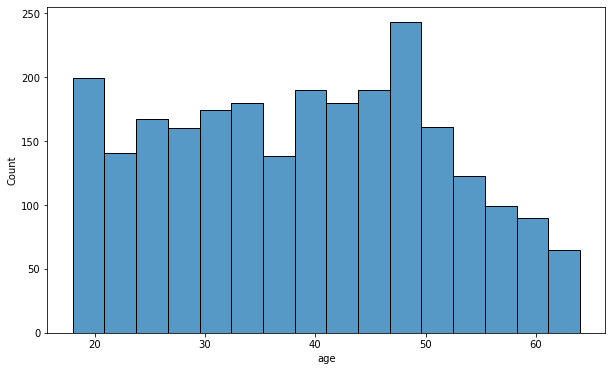

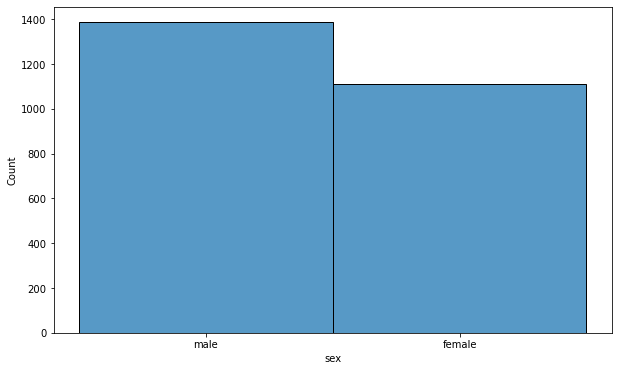

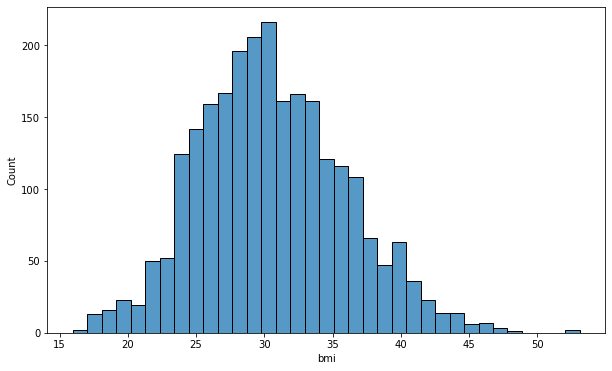

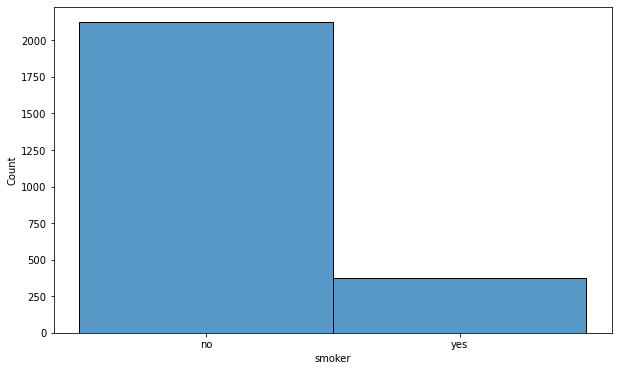

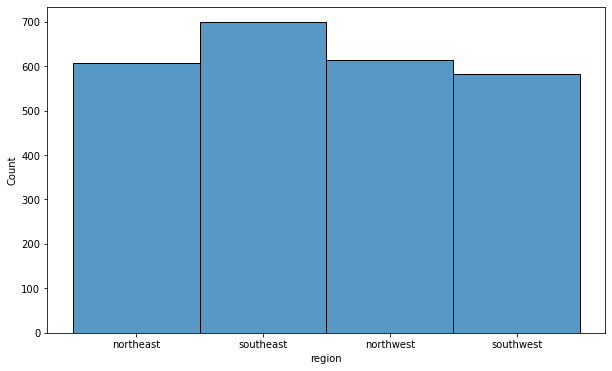

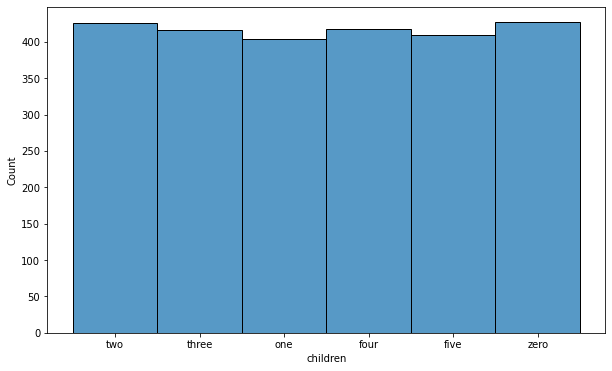

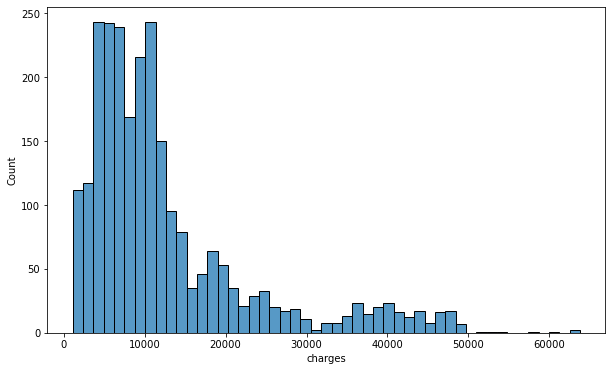

In [13]:
for i,col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

In [14]:
for i in df.columns:
    print(df[i].unique())

[21.         36.976978   18.         ... 32.87712067 31.05805097
 36.83381823]
['male' 'female']
[25.745      25.74416485 30.03       ... 36.17958688 36.42961358
 36.64057852]
['no' 'yes']
['northeast' 'southeast' 'northwest' 'southwest']
['two' 'three' 'one' 'four' 'five' 'zero']
[ 3279.86855    21454.49423864  1720.3537     ... 12401.74657543
 10376.29462922  6658.23740414]


In [15]:
outliers = []
def detect_outliers_iqr(df):
    for i in df.columns:
        q1, q3 = df[i].quantile([0.25, 0.75])
       
        IQR = q3-q1
        lwr_bound = q1-(1.5*IQR)
        upr_bound = q3+(1.5*IQR)
        for j in df[i]: 
            if (j<lwr_bound or j>upr_bound):
                for z in list(df[i][df[i] == j].index):
                    outliers.append(z)
    
    return df.iloc[outliers]

In [16]:
detect_outliers_iqr(df[["age", "bmi", "charges"]])

,age,bmi,charges
41,47.000,46.986,8083.178
279,46.000,48.070,9432.925
316,22.000,52.580,44501.398
448,47.000,45.320,8569.862
539,25.000,45.540,42112.236
...,...,...,...
2439,34.000,30.800,35491.640
2451,51.227,31.795,29762.311
2454,23.713,32.809,36036.280
2479,44.272,42.949,45841.469


In [17]:
df_with_EDA = df.drop(outliers, axis = 0)
df_with_EDA

,age,sex,bmi,smoker,region,children,charges
0,21.000,male,25.745,no,northeast,two,3279.869
1,36.977,female,25.744,yes,southeast,three,21454.494
2,18.000,male,30.030,no,southeast,one,1720.354
3,37.000,male,30.677,no,northeast,three,6801.438
4,58.000,male,32.010,no,southeast,one,11946.626
...,...,...,...,...,...,...,...
2495,31.058,male,27.555,no,southeast,four,5889.104
2496,36.834,male,30.322,no,northeast,three,6788.534
2497,56.000,female,36.180,no,northwest,two,12401.747
2498,49.000,male,36.430,no,northwest,three,10376.295


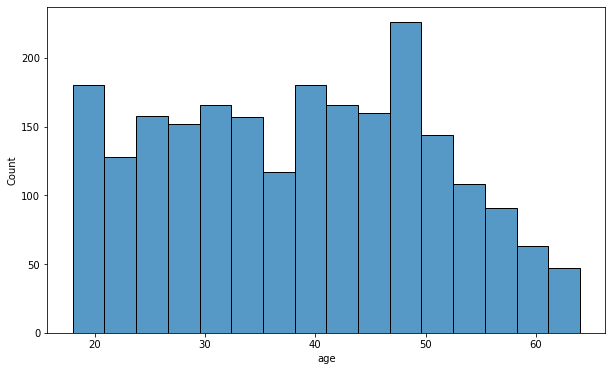

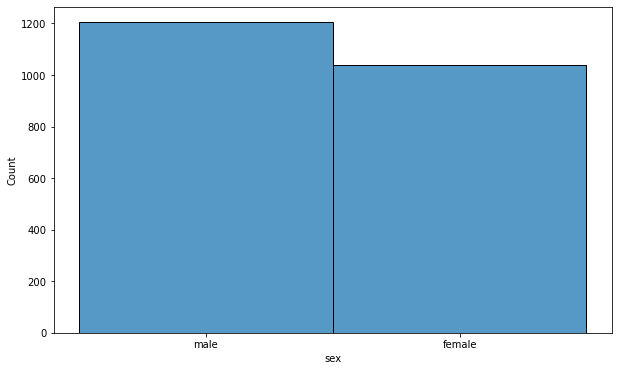

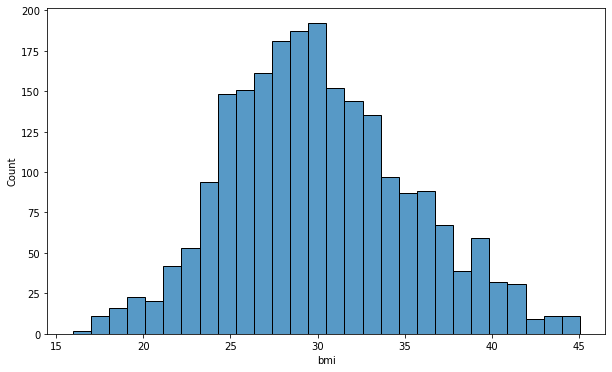

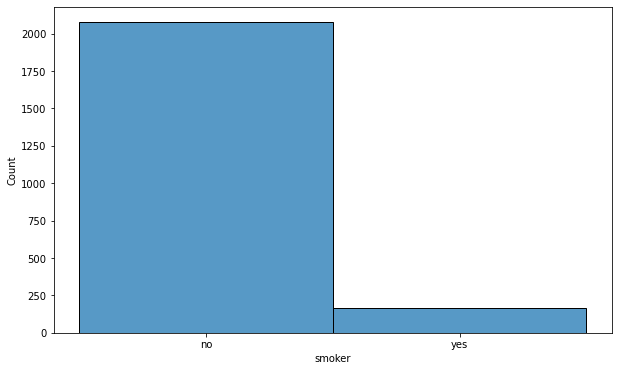

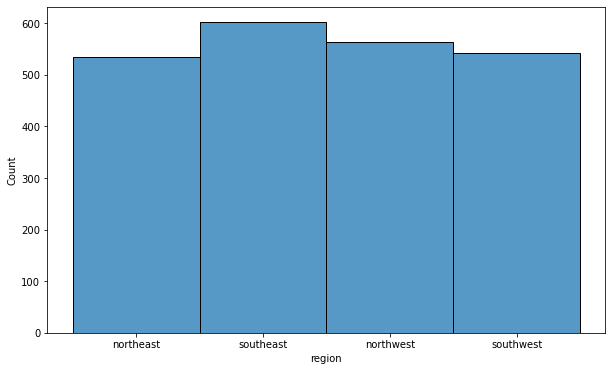

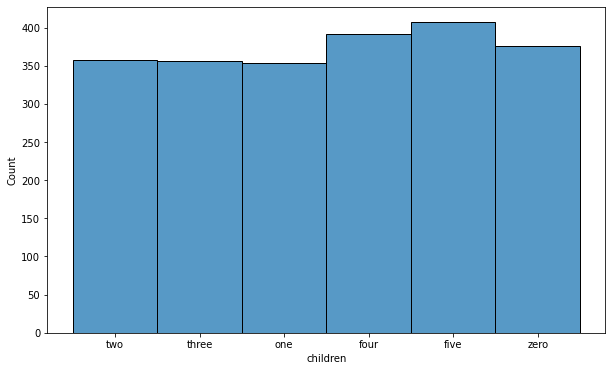

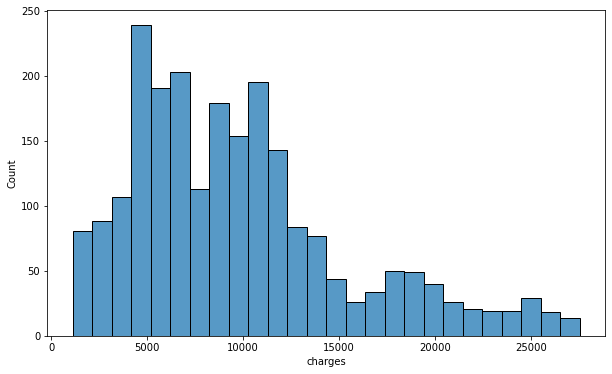

In [18]:
for i,col in enumerate(df_with_EDA.columns):
    plt.figure(i)
    sns.histplot(df_with_EDA[col])

## without EDA lm model

In [20]:
# children charges 

In [21]:
df = pd.get_dummies(df,drop_first=True)
df

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_four,children_one,children_three,children_two,children_zero
0,21.000,25.745,3279.869,1,0,0,0,0,0,0,0,1,0
1,36.977,25.744,21454.494,0,1,0,1,0,0,0,1,0,0
2,18.000,30.030,1720.354,1,0,0,1,0,0,1,0,0,0
3,37.000,30.677,6801.438,1,0,0,0,0,0,0,1,0,0
4,58.000,32.010,11946.626,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,31.058,27.555,5889.104,1,0,0,1,0,1,0,0,0,0
2496,36.834,30.322,6788.534,1,0,0,0,0,0,0,1,0,0
2497,56.000,36.180,12401.747,0,0,1,0,0,0,0,0,1,0
2498,49.000,36.430,10376.295,1,0,1,0,0,0,0,1,0,0


In [22]:
X = df.drop("charges", axis=1)
y = df["charges"]
X

,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_four,children_one,children_three,children_two,children_zero
0,21.000,25.745,1,0,0,0,0,0,0,0,1,0
1,36.977,25.744,0,1,0,1,0,0,0,1,0,0
2,18.000,30.030,1,0,0,1,0,0,1,0,0,0
3,37.000,30.677,1,0,0,0,0,0,0,1,0,0
4,58.000,32.010,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,31.058,27.555,1,0,0,1,0,1,0,0,0,0
2496,36.834,30.322,1,0,0,0,0,0,0,1,0,0
2497,56.000,36.180,0,0,1,0,0,0,0,0,1,0
2498,49.000,36.430,1,0,1,0,0,0,0,1,0,0


In [23]:
y

0       3279.869
1      21454.494
2       1720.354
3       6801.438
4      11946.626
          ...   
2495    5889.104
2496    6788.534
2497   12401.747
2498   10376.295
2499    6658.237
Name: charges, Length: 2500, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (2000, 12)
Train target shape   :  (2000,)
Test features shape  :  (500, 12)
Test target shape    :  (500,)


## 3. Implement Linear Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [26]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [27]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [28]:
pd.options.display.float_format = '{:.3f}'.format
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.721,0.713
mae,3852.684,3662.539
mse,31847154.792,29924249.341
rmse,5643.328,5470.306


## CV

In [29]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [30]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.011,0.009,0.676,-3681.764,-30909282.495,-5559.612
2,0.012,0.010,0.716,-4220.347,-37957593.272,-6160.973
3,0.009,0.006,0.753,-3787.904,-29508969.278,-5432.216
4,0.005,0.004,0.723,-3793.477,-30751256.075,-5545.382
5,0.005,0.003,0.750,-3746.076,-28502305.229,-5338.755
6,0.004,0.002,0.681,-3729.403,-29775839.214,-5456.724
7,0.002,0.003,0.666,-3852.818,-30970698.178,-5565.132
8,0.003,0.002,0.754,-3871.741,-30254269.699,-5500.388
9,0.002,0.002,0.675,-3711.604,-31651127.217,-5625.933
10,0.002,0.002,0.722,-4385.613,-42369455.821,-6509.182


In [31]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()


test_r2                                    0.712
test_neg_mean_absolute_error           -3878.075
test_neg_mean_squared_error        -32265079.648
test_neg_root_mean_squared_error       -5669.430
dtype: float64

In [32]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.721,0.713
mae,3852.684,3662.539
mse,31847154.792,29924249.341
rmse,5643.328,5470.306


In [33]:
#def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

IndentationError: unexpected indent (<ipython-input-33-3365eacd9228>, line 2)

In [34]:
#y_pred = lm.predict(X_test)

In [35]:
#adj_r2(y_test, y_pred, df_with_EDA)

In [36]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.721,0.713
mae,3852.684,3662.539
mse,31847154.792,29924249.341
rmse,5643.328,5470.306


## Scaling

In [37]:
scaler = MinMaxScaler()  # dummylerden kaynaklı bunu seçtik
scaler.fit(X_train)
# dummy olanlar 0 ve 1 olarak kalsın diye 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


<IPython.core.display.Javascript object>

## Ridge

In [38]:
from sklearn.linear_model import Ridge, RidgeCV

In [39]:
ridge_model = Ridge(random_state=42)

In [40]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [41]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.721,0.713
mae,3851.416,3662.341
mse,31849783.676,29917991.536
rmse,5643.561,5469.734


## Finding best alpha for Ridge

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
alpha_space = np.linspace(0.0001, 1, 100)
alpha_space

array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1.314e-01, 1.415e-01, 1.516e-01, 1.617e-01, 1.718e-01,
       1.819e-01, 1.920e-01, 2.021e-01, 2.122e-01, 2.223e-01, 2.324e-01,
       2.425e-01, 2.526e-01, 2.627e-01, 2.728e-01, 2.829e-01, 2.930e-01,
       3.031e-01, 3.132e-01, 3.233e-01, 3.334e-01, 3.435e-01, 3.536e-01,
       3.637e-01, 3.738e-01, 3.839e-01, 3.940e-01, 4.041e-01, 4.142e-01,
       4.243e-01, 4.344e-01, 4.445e-01, 4.546e-01, 4.647e-01, 4.748e-01,
       4.849e-01, 4.950e-01, 5.051e-01, 5.152e-01, 5.253e-01, 5.354e-01,
       5.455e-01, 5.556e-01, 5.657e-01, 5.758e-01, 5.859e-01, 5.960e-01,
       6.061e-01, 6.162e-01, 6.263e-01, 6.364e-01, 6.465e-01, 6.566e-01,
       6.667e-01, 6.768e-01, 6.869e-01, 6.970e-01, 7.071e-01, 7.172e-01,
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 

In [44]:
ridge_model = Ridge(random_state=42)

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)  

In [45]:
ridge_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1.314e-01, 1.415e-01, 1.516e-01, 1.617e-01, 1.718e-01,
       1.819e-01, 1.920e-01, 2.021e-01, 2.122e-01, 2.223e-01, 2.324e-01,
       2.425e-01, 2.526e-01, 2...
       6.667e-01, 6.768e-01, 6.869e-01, 6.970e-01, 7.071e-01, 7.172e-01,
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00])},
             scoring='neg_root_mean_squared_error')

In [46]:
ridge_grid_model.best_params_

{'alpha': 0.697}

In [47]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006,0.001,0.001,0.000,0.000,{'alpha': 0.0001},-5559.612,-6160.974,-5432.216,-5545.382,-5338.755,-5456.724,-5565.131,-5500.389,-5625.933,-6509.183,-5669.430,350.208,100
1,0.003,0.002,0.001,0.000,0.010,{'alpha': 0.010199999999999999},-5559.590,-6160.990,-5432.183,-5545.383,-5338.794,-5456.676,-5565.024,-5500.487,-5625.907,-6509.223,-5669.426,350.220,99
2,0.002,0.000,0.000,0.000,0.020,{'alpha': 0.0203},-5559.569,-6161.006,-5432.150,-5545.385,-5338.833,-5456.628,-5564.917,-5500.584,-5625.882,-6509.262,-5669.422,350.233,98
3,0.002,0.000,0.001,0.000,0.030,{'alpha': 0.0304},-5559.548,-6161.022,-5432.117,-5545.387,-5338.872,-5456.580,-5564.810,-5500.681,-5625.856,-6509.302,-5669.418,350.246,97
4,0.002,0.000,0.001,0.000,0.041,{'alpha': 0.0405},-5559.527,-6161.038,-5432.085,-5545.389,-5338.911,-5456.533,-5564.703,-5500.779,-5625.830,-6509.342,-5669.414,350.258,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001,0.000,0.000,0.000,0.960,{'alpha': 0.9595999999999999},-5557.887,-6162.773,-5429.418,-5545.820,-5342.691,-5452.524,-5555.268,-5509.692,-5623.737,-6513.281,-5669.309,351.460,53
96,0.001,0.000,0.000,0.000,0.970,{'alpha': 0.9697},-5557.872,-6162.795,-5429.392,-5545.827,-5342.735,-5452.483,-5555.168,-5509.791,-5623.717,-6513.327,-5669.311,351.474,55
97,0.001,0.000,0.000,0.000,0.980,{'alpha': 0.9798},-5557.857,-6162.817,-5429.366,-5545.834,-5342.779,-5452.442,-5555.067,-5509.889,-5623.696,-6513.374,-5669.312,351.488,57
98,0.001,0.000,0.000,0.000,0.990,{'alpha': 0.9899},-5557.842,-6162.838,-5429.340,-5545.842,-5342.823,-5452.402,-5554.967,-5509.988,-5623.676,-6513.420,-5669.314,351.501,59


In [48]:
ridge_grid_model.best_index_

69

In [49]:
ridge_grid_model.best_score_  # rmse

-5669.289412602639

In [50]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.721,0.713
mae,3851.734,3662.337
mse,31848443.136,29919273.961
rmse,5643.442,5469.851


In [51]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [52]:
ridge = Ridge(alpha=0.0001, random_state=42).fit(X_train_scaled, y_train)

rg_coef = pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")
rg_coef


,Coef
region_northwest,-2490.234
region_southwest,-2431.849
region_southeast,-1855.019
children_zero,-1620.000
children_one,-1619.551
children_three,-1130.725
children_two,-15.830
sex_male,1334.105
children_four,2244.936
bmi,9390.040


In [53]:
train_val(ridge, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.721,0.713
mae,3852.684,3662.539
mse,31847154.792,29924248.419
rmse,5643.328,5470.306


## 5. Implement Lasso Regression

In [54]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

<IPython.core.display.Javascript object>

In [55]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1.314e-01, 1.415e-01, 1.516e-01, 1.617e-01, 1.718e-01,
       1.819e-01, 1.920e-01, 2.021e-01, 2.122e-01, 2.223e-01, 2.324e-01,
       2.425e-01, 2.526e-01, 2...
       6.667e-01, 6.768e-01, 6.869e-01, 6.970e-01, 7.071e-01, 7.172e-01,
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00])},
             scoring='neg_root_mean_squared_error')

In [56]:
lasso_grid_model.best_params_

{'alpha': 1.0}

In [57]:
lasso_grid_model.best_score_ 

-5669.310186216362

In [58]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.721,0.713
mae,3851.728,3661.211
mse,31847346.548,29912192.408
rmse,5643.345,5469.204


In [59]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [62]:
lasso = Lasso(alpha=1, random_state=42).fit(X_train_scaled, y_train)
ls_coef = pd.DataFrame(lasso.coef_, index = X.columns, columns=["lasso_Coef"]).sort_values("lasso_Coef")

<IPython.core.display.Javascript object>

In [63]:
pd.concat([rg_coef,ls_coef], axis = 1)

,Coef,lasso_Coef
region_northwest,-2490.234,-2473.847
region_southwest,-2431.849,-2412.461
region_southeast,-1855.019,-1832.427
children_zero,-1620.000,-1594.788
children_one,-1619.551,-1593.396
children_three,-1130.725,-1102.938
children_two,-15.830,0.000
sex_male,1334.105,1334.240
children_four,2244.936,2260.411
bmi,9390.040,9338.449


## 6. Implement Elastic-Net

In [64]:
from sklearn.linear_model import ElasticNet

In [65]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

In [66]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.261,0.250
mae,6547.073,6342.650
mse,84348868.143,78099750.712
rmse,9184.164,8837.406


In [67]:
elastic_model = ElasticNet(random_state=42)

In [68]:
param_grid = {'alpha':alpha_space,  #Sabaha kadar beklemeyelim.
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [69]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-04, 1.020e-02, 2.030e-02, 3.040e-02, 4.050e-02, 5.060e-02,
       6.070e-02, 7.080e-02, 8.090e-02, 9.100e-02, 1.011e-01, 1.112e-01,
       1.213e-01, 1.314e-01, 1.415e-01, 1.516e-01, 1.617e-01, 1.718e-01,
       1.819e-01, 1.920e-01, 2.021e-01, 2.122e-01, 2.223e-01, 2.324e-01,
       2.425e-01, 2.526e...
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00]),
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [70]:
elastic_grid_model.best_params_

{'alpha': 0.0405, 'l1_ratio': 0.99}

In [71]:
elastic_grid_model.best_score_

-5669.287586109934

In [72]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.721,0.713
mae,3851.569,3662.282
mse,31848923.813,29918260.324
rmse,5643.485,5469.759


In [73]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))